In [1]:
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt

Auxiliary functions

In [2]:
def showBP(dbPath, patient, idx):
    "Prints SBP and DBP of segment idx from patient"

    if not os.path.isdir(dbPath):
        raise Exception(f'Check if dbPath "{dbPath}" is correct')

    labels_fn = patient + '_labels.npy'
    labels = np.load(os.path.join(dbPath, labels_fn))
    assert labels.shape == (30, 2), 'Problem reading "{labels_fn}"'

    # systolic blood pressure, sbp, and diastolic blood pressure, dbp
    sbp, dbp = labels[idx,:]
    print(f'Patient {patient}, segment {idx}')
    print(f'SBP = {sbp} mmHg\nDBP = {dbp} mmHg')


def plotWaves(dbPath, patient, idx):
    "Plots first 5 seconds of waveforms"
    print(f'\nFirst 5 seconds of waveforms\n')
    waves = ['abp', 'ecg', 'ppg', 'resp']
    for wav in waves:
        wave_fn = patient + '_' + wav + '.npy'
        wave = np.load(os.path.join(dbPath, wave_fn))
        assert wave.shape == (30, 3750), 'Problem reading "{wave_fn}"'

        fs = 125  # sampling frequency
        N = len(wave[idx])  # number of samples in a segment
        t = np.arange(N) / fs  # time index
        tidx = t < 5  # plot first five seconds
        plt.plot(t[tidx], wave[idx][tidx])
        plt.xlabel('time (s)')
        if 'abp' == wav:
            plt.ylabel('ABP (mmHg)')
        else:
            plt.ylabel(f'{wav.upper()}')
        plt.title(f'Patient {patient}, segment {idx}')
        plt.grid()
        plt.show()


Arguments

In [5]:
dbPath = '../mimic_T30_deltaBP25_30spp/'  # path to .npy files
patient = 'p093833'     # patient ID
idx = 29                # segment 0 <= idx <= 29

In [6]:
showBP(dbPath, patient, idx)

Patient p093833, segment 29
SBP = 143.6 mmHg
DBP = 91.4 mmHg



First 5 seconds of waveforms



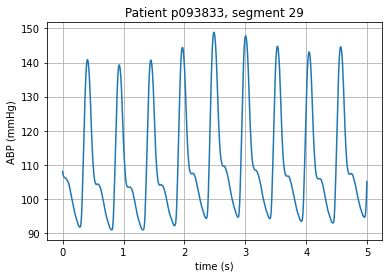

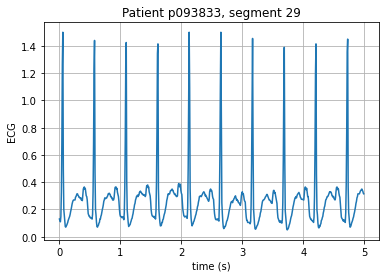

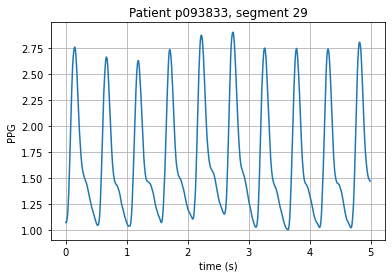

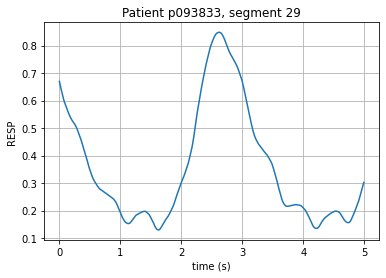

In [7]:
plotWaves(dbPath, patient, idx)